# Task-3

## Multiple Linear Regression on Diabetes Dataset

In [1]:
import pandas as pd  #for data manipulation.
import numpy as np   #for scientific computing.
import sklearn       #for machine learning
import seaborn as sns #visualization package
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt #plotting & visualization.

%matplotlib inline  
#to present the visualizations as a part of the notebook itself

In [2]:
#importing the inbuilt dataset in sklearn package for performing regression analysis.
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
diabetes.feature_names   #checking the feature names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
diabetes.data.shape  #checking the shape of data

(442, 10)

There are 10 variables & 442 instances/rows

In [6]:
diabetes.target.shape #checking shape of target column

(442,)

The Target Variable has 442 rows

### Creating a Dataframe using this data

In [7]:
db_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

In [8]:
db_df.head(5)    #checking a sample of the dataframe

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Note: As per dataset documentation: "Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1)". That is the reason we see that the variables to have seemingly odd values,they are centered to bring them to a common scale.

In [9]:
db_df['Progression'] = diabetes.target #new column name 'Progression'
db_df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [10]:
corr = db_df.corr()
corr #Let us check the Linear correlation between the variables in the dataframe

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


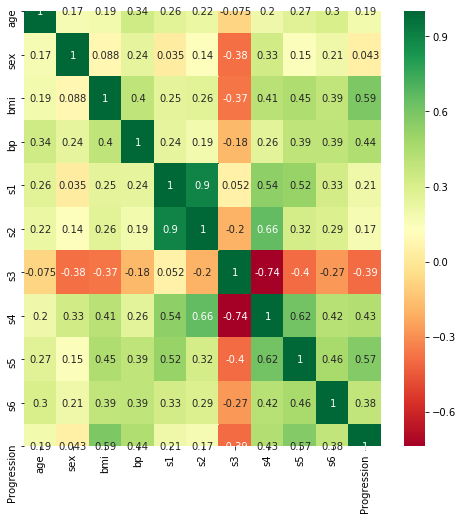

In [11]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

This plot shows the linear correlation between the variables within themselves & also variables with the target 'Progression'. This could be a phase where the variables which are multicollinear can be eliminated. Since this example will serve as an example of methodology followed in builiding a model, we are not going for feature selection (which will be an article in itself).

### MODELLING

In [12]:
#independent variables / explanatory variables
x = db_df.drop(labels='Progression', axis=1)  #axis=1 means we drop data by column.

#dependent variable / response / target variable.
y = db_df['Progression']

print(x, y)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1  

#### Now x contains independent variables & y the target variable instances.

In [13]:
#splitting the dataset into 80%-20% train-test split 
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.20,random_state=0)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(353, 10)
(89, 10)
(353,)
(89,)


In [14]:
#let us import the linear regression from sklearn & create instance of the model.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [15]:
# training the model
lm.fit(train_x, train_y)

LinearRegression()

In [16]:
#predicting values
predicted_y = lm.predict(test_x)

In [17]:
# Evaluating the model
from sklearn import metrics as mt

In [18]:
# Accuracy of the model
print("1) The model explains,", np.round(mt.explained_variance_score(test_y,predicted_y)*100,2))
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(test_y,predicted_y ),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(test_y,predicted_y),2))
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(test_y,predicted_y ),2))
print("3) The Mean Squared Error of the model is " , np.round(mt.mean_squared_error(test_y,predicted_y),2))

1) The model explains, 33.3
2) The Mean Absolute Error of model is: 46.17
3) The R-Square score of the model is  0.33
2) The Mean Absolute Error of model is: 46.17
3) The Mean Squared Error of the model is  3424.32


In [19]:
# coefficient and intercepts
coeff = pd.Series(lm.coef_, index = train_x.columns)
intercept = lm.intercept_

In [20]:
print("Coefficients:\n")
print(coeff)
print("\n")
print("Intercept:\n")
print(intercept)
print("\n")

Coefficients:

age    -35.556837
sex   -243.169226
bmi    562.754046
bp     305.472030
s1    -662.787721
s2     324.275275
s3      24.781933
s4     170.330565
s5     731.678108
s6      43.028468
dtype: float64


Intercept:

152.5381335195406




### The regression Equation would be :

Diabetes Progression = Intercept + coeff(1) X age + coeff(2) X sex +.....+ coeff(10) X s6

### Y=  -35.56*AGE -243.17*SEX  + 562.75*BMI  + 305.47*BP + -662.79*S1 + 324.28*S2 + 24.78*S3 + 170.33*S4 + 731.68*S5  43.03*S6 + 152.53

In [21]:
print(lm.predict([[ 0.04534098,  0.05068012, -0.00297252,  0.10794412,  0.03558177,  0.02248541, 0.02655027, 
                           -0.00259226,  0.02801651,  0.01963284]])) #predicting without scaling

[175.17178414]


In [22]:
from sklearn.preprocessing import StandardScaler #scaling features
sc=StandardScaler()
print(lm.predict(sc.fit_transform([[59, 2, 32.1, 101, 157, 93.2, 38, 4, 4.8598, 87]]))) #redicitng after scaling

[152.53813352]
